In [22]:
# %matplotlib inline
import io_utils 

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import os

In [20]:
def conv2polar(vars):
    rho = np.sqrt(vars[0]**2 + vars[1]**2 + vars[2]**2)
    theta = np.arctan(vars[1]/vars[0])
    phi = np.arccos(vars[2]/rho)
    return [rho, theta, phi]

In [21]:
df = pd.read_csv('2009_2022CompleteMag.csv')
r = []
t = []
p = []
for i in df.index:
    v = [df['dbn_nez'][i], df['dbe_nez'][i], df['dbz_nez'][i]]
    nv = conv2polar(v)
    r.append(nv[0])
    t.append(nv[1])
    p.append(nv[2])

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df['rho'] = r
df['theta'] = t
df['phi'] = p
print(df.head())

   ID             Date_UTC  Extent IAGA  GEOLON  GEOLAT  MAGON  MAGLAT    MLT  \
0   0  2009-01-01T00:00:00      60  RES  265.11   74.69  -36.1   82.95  16.37   
1   1  2009-01-01T00:01:00      60  RES  265.11   74.69  -36.1   82.95  16.39   
2   2  2009-01-01T00:02:00      60  RES  265.11   74.69  -36.1   82.95  16.41   
3   3  2009-01-01T00:03:00      60  RES  265.11   74.69  -36.1   82.95  16.43   
4   4  2009-01-01T00:04:00      60  RES  265.11   74.69  -36.1   82.95  16.44   

   MCOLAT  ...     SZA  dbn_nez  dbe_nez  dbz_nez  dbn_geo  dbe_geo  dbz_geo  \
0    7.05  ...  110.65      5.1    -16.8    -12.4     -4.2    -17.1    -12.4   
1    7.05  ...  110.71      5.1    -16.8    -12.4     -4.2    -17.1    -12.4   
2    7.05  ...  110.78      6.4    -17.2    -11.4     -3.3    -18.1    -11.4   
3    7.05  ...  110.84      5.9    -16.4    -10.4     -3.3    -17.1    -10.4   
4    7.05  ...  110.91      6.3    -15.1    -10.4     -2.3    -16.2    -10.4   

         rho     theta       phi

In [ ]:
df.to_csv("2009_2022CompleteMagPOLAR.csv")

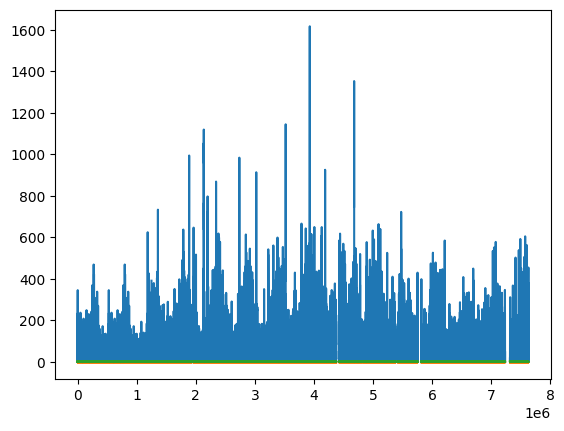

In [23]:
df = pd.read_csv('2009_2022CompleteMagPOLAR.csv')

plt.plot(df['rho'])
plt.plot(df['theta'])
plt.plot(df['phi'])

In [24]:
df.describe()

,Unnamed: 0,ID,Extent,GEOLON,GEOLAT,MAGON,MAGLAT,MLT,MCOLAT,IGRF_DECL,SZA,dbn_nez,dbe_nez,dbz_nez,dbn_geo,dbe_geo,dbz_geo,rho,theta,phi
count,7.888320e+06,7.888320e+06,7888320.0,7.888320e+06,7.888320e+06,7.888320e+06,7.888320e+06,7.888320e+06,7.888320e+06,7.888320e+06,7.888320e+06,7.237756e+06,7.237756e+06,7.237756e+06,7.237756e+06,7.237756e+06,7.237756e+06,7.237756e+06,7.237549e+06,7.237754e+06
mean,3.944160e+06,2.629438e+05,60.0,2.651100e+02,7.469000e+01,-3.557742e+01,8.293165e+01,1.193883e+01,7.068354e+00,-2.470545e+01,8.962606e+01,5.235627e+00,-6.731439e-01,6.489063e+00,4.454830e+00,-2.823147e+00,6.489063e+00,4.868396e+01,8.811213e-02,1.404079e+00
std,2.277162e+06,1.518113e+05,0.0,4.465079e-08,3.076679e-09,1.126350e-01,4.779449e-03,6.922598e+00,4.779449e-03,4.074710e+00,1.941321e+01,4.260469e+01,4.124073e+01,4.070852e+01,4.558377e+01,3.792263e+01,4.070852e+01,5.360023e+01,9.071101e-01,6.229032e-01
min,0.000000e+00,0.000000e+00,60.0,2.651100e+02,7.469000e+01,-3.610000e+01,8.293000e+01,0.000000e+00,7.050000e+00,-3.074000e+01,5.125000e+01,-1.261100e+03,-1.337200e+03,-1.321400e+03,-1.137400e+03,-1.169000e+03,-1.321400e+03,0.000000e+00,-1.570796e+00,0.000000e+00
25%,1.972080e+06,1.314718e+05,60.0,2.651100e+02,7.469000e+01,-3.554000e+01,8.293000e+01,5.930000e+00,7.070000e+00,-2.833000e+01,7.532000e+01,-7.500000e+00,-1.330000e+01,-4.500000e+00,-9.400000e+00,-1.430000e+01,-4.500000e+00,1.346328e+01,-6.893491e-01,9.573725e-01
50%,3.944160e+06,2.629435e+05,60.0,2.651100e+02,7.469000e+01,-3.554000e+01,8.293000e+01,1.198000e+01,7.070000e+00,-2.509000e+01,8.943000e+01,2.600000e+00,0.000000e+00,3.400000e+00,2.200000e+00,-1.200000e+00,3.400000e+00,3.083926e+01,1.776813e-01,1.376675e+00
75%,5.916239e+06,3.944152e+05,60.0,2.651100e+02,7.469000e+01,-3.554000e+01,8.293000e+01,1.791000e+01,7.070000e+00,-2.106000e+01,1.038300e+02,1.780000e+01,1.260000e+01,1.670000e+01,1.790000e+01,9.500000e+00,1.670000e+01,6.431400e+01,8.644411e-01,1.810689e+00
max,7.888319e+06,5.270390e+05,60.0,2.651100e+02,7.469000e+01,-3.554000e+01,8.295000e+01,2.400000e+01,7.070000e+00,-1.752000e+01,1.287500e+02,1.237400e+03,7.946000e+02,1.016100e+03,1.276300e+03,1.005400e+03,1.016100e+03,1.617604e+03,1.570796e+00,3.141593e+00


In [25]:
print(df['rho'])
df = df.reset_index()

0          21.494418
1          21.494418
2          21.604629
3          20.296059
4          19.387109
             ...    
7888315          NaN
7888316          NaN
7888317          NaN
7888318          NaN
7888319          NaN
Name: rho, Length: 7888320, dtype: float64


In [26]:
date = '2013-06-05'
df2 = pd.read_csv(date+'.csv')

print(mdates.date2num(df2['t']))
indicies = df.loc[(mdates.date2num(df['Date_UTC']) >= mdates.date2num(df2['t'])[0]) & (mdates.date2num(df['Date_UTC']) <= mdates.date2num(df2['t'])[-1])]
indicies = indicies.reset_index()
print(len(indicies))
data = {
    't':df2['t'],
    'ybz':df2['ybz'],
    'dbz_rho':indicies['rho'],
    'dbz_theta':indicies['theta'],
    'dbz_phi':indicies['phi'],
    'Vvels_Vest_ns':df2['Vvels_Vest_ns'],
    'Vvels_Vest_ew':df2['Vvels_Vest_ew'],
}
df3 = pd.DataFrame(data)
df3.to_csv(date+'FINAL.csv')

[15861.83413988 15861.83418328 15861.83422669 ... 15865.62064625
 15865.62068965 15865.62073305]
5452


In [27]:
date = '2014-09-11'
df2 = pd.read_csv(date+'.csv')

print(mdates.date2num(df2['t']))
indicies = df.loc[(mdates.date2num(df['Date_UTC']) >= mdates.date2num(df2['t'])[0]) & (mdates.date2num(df['Date_UTC']) <= mdates.date2num(df2['t'])[-1])]
indicies = indicies.reset_index()
print(len(indicies))
data = {
    't':df2['t'],
    'ybz':df2['ybz'],
    'dbz_rho':indicies['rho'],
    'dbz_theta':indicies['theta'],
    'dbz_phi':indicies['phi'],
    'Vvels_Vest_ns':df2['Vvels_Vest_ns'],
    'Vvels_Vest_ew':df2['Vvels_Vest_ew'],
}
df3 = pd.DataFrame(data)
df3.to_csv(date+'FINAL.csv')

[16324.89702914 16324.89707254 16324.89711594 ... 16328.56296521
 16328.56300861 16328.56305201]
5279


In [28]:
# date = '2015-06-08'
# df2 = pd.read_csv(date+'.csv')

# print(mdates.date2num(df2['t']))
# indicies = df.loc[(mdates.date2num(df['Date_UTC']) >= mdates.date2num(df2['t'])[0]) & (mdates.date2num(df['Date_UTC']) <= mdates.date2num(df2['t'])[-1])]
# indicies = indicies.reset_index()
# print(len(indicies))
# data = {
#     't':df2['t'],
#     'ybz':df2['ybz'],
#     'dbz_rho':indicies['rho'],
#     'dbz_theta':indicies['theta'],
#     'dbz_phi':indicies['phi'],
#     'Vvels_Vest_ns':df2['Vvels_Vest_ns'],
#     'Vvels_Vest_ew':df2['Vvels_Vest_ew'],
# }
# df3 = pd.DataFrame(data)
# df3.to_csv(date+'FINAL.csv')

In [29]:
date = '2015-06-22'
df2 = pd.read_csv(date+'.csv')

print(mdates.date2num(df2['t']))
indicies = df.loc[(mdates.date2num(df['Date_UTC']) >= mdates.date2num(df2['t'])[0]) & (mdates.date2num(df['Date_UTC']) <= mdates.date2num(df2['t'])[-1])]
indicies = indicies.reset_index()
print(len(indicies))
data = {
    't':df2['t'],
    'ybz':df2['ybz'],
    'dbz_rho':indicies['rho'],
    'dbz_theta':indicies['theta'],
    'dbz_phi':indicies['phi'],
    'Vvels_Vest_ns':df2['Vvels_Vest_ns'],
    'Vvels_Vest_ew':df2['Vvels_Vest_ew'],
}
df3 = pd.DataFrame(data)
df3.to_csv(date+'FINAL.csv')

[16608.76211453 16608.76215793 16608.76220133 ... 16611.96660227
 16611.96664568 16611.96668908]
4615


In [30]:
date = '2016-06-23'
df2 = pd.read_csv(date+'.csv')

print(mdates.date2num(df2['t']))
indicies = df.loc[(mdates.date2num(df['Date_UTC']) >= mdates.date2num(df2['t'])[0]) & (mdates.date2num(df['Date_UTC']) <= mdates.date2num(df2['t'])[-1])]
indicies = indicies.reset_index()
print(len(indicies))
data = {
    't':df2['t'],
    'ybz':df2['ybz'],
    'dbz_rho':indicies['rho'],
    'dbz_theta':indicies['theta'],
    'dbz_phi':indicies['phi'],
    'Vvels_Vest_ns':df2['Vvels_Vest_ns'],
    'Vvels_Vest_ew':df2['Vvels_Vest_ew'],
}
df3 = pd.DataFrame(data)
df3.to_csv(date+'FINAL.csv')

[16975.00151905 16975.00156246 16975.00160586 ... 16978.99965277
 16978.99969617 16978.99973958]
5757


In [31]:
date = '2016-08-02'
df2 = pd.read_csv(date+'.csv')

print(mdates.date2num(df2['t']))
indicies = df.loc[(mdates.date2num(df['Date_UTC']) >= mdates.date2num(df2['t'])[0]) & (mdates.date2num(df['Date_UTC']) <= mdates.date2num(df2['t'])[-1])]
indicies = indicies.reset_index()
print(len(indicies))
data = {
    't':df2['t'],
    'ybz':df2['ybz'],
    'dbz_rho':indicies['rho'],
    'dbz_theta':indicies['theta'],
    'dbz_phi':indicies['phi'],
    'Vvels_Vest_ns':df2['Vvels_Vest_ns'],
    'Vvels_Vest_ew':df2['Vvels_Vest_ew'],
}
df3 = pd.DataFrame(data)
df3.to_csv(date+'FINAL.csv')

[17015.00097584 17015.00102069 17015.00106554 ... 17018.99913859
 17018.99918344 17018.99922828]
5757


In [32]:
# date = '2016-08-22'
# df2 = pd.read_csv(date+'.csv')

# print(mdates.date2num(df2['t']))
# indicies = df.loc[(mdates.date2num(df['Date_UTC']) >= mdates.date2num(df2['t'])[0]) & (mdates.date2num(df['Date_UTC']) <= mdates.date2num(df2['t'])[-1])]
# indicies = indicies.reset_index()
# print(len(indicies))
# data = {
#     't':df2['t'],
#     'ybz':df2['ybz'],
#     'dbz_rho':indicies['rho'],
#     'dbz_theta':indicies['theta'],
#     'dbz_phi':indicies['phi'],
#     'Vvels_Vest_ns':df2['Vvels_Vest_ns'],
#     'Vvels_Vest_ew':df2['Vvels_Vest_ew'],
# }
# df3 = pd.DataFrame(data)
# df3.to_csv(date+'FINAL.csv')

In [33]:
date = '2017-05-15'
df2 = pd.read_csv(date+'.csv')

print(mdates.date2num(df2['t']))
indicies = df.loc[(mdates.date2num(df['Date_UTC']) >= mdates.date2num(df2['t'])[0]) & (mdates.date2num(df['Date_UTC']) <= mdates.date2num(df2['t'])[-1])]
indicies = indicies.reset_index()
print(len(indicies))
data = {
    't':df2['t'],
    'ybz':df2['ybz'],
    'dbz_rho':indicies['rho'],
    'dbz_theta':indicies['theta'],
    'dbz_phi':indicies['phi'],
    'Vvels_Vest_ns':df2['Vvels_Vest_ns'],
    'Vvels_Vest_ew':df2['Vvels_Vest_ew'],
}
df3 = pd.DataFrame(data)
df3.to_csv(date+'FINAL.csv')

[17301.69634713 17301.69639198 17301.69643683 ... 17302.66574956
 17302.66579441 17302.66583925]
1396
